In [1]:
!pip install sentence-transformers pandas numpy matplotlib


In [2]:
import pandas as pd

data = [
    ("A man is eating food", "A person is eating a meal", 0.9),
    ("A dog is running", "A cat is sleeping", 0.2),
    ("Children are playing in park", "Kids are playing outside", 0.85),
    ("She is reading a book", "She is writing a letter", 0.3),
    ("The sky is blue", "The ocean is blue", 0.6),
    ("He is driving a car", "He is riding a bike", 0.4),
    ("The boy is happy", "The child is joyful", 0.88),
    ("She is cooking food", "She is preparing a meal", 0.9),
    ("Birds are flying", "Fish are swimming", 0.25),
    ("The man is sleeping", "The man is awake", 0.1)
]

df = pd.DataFrame(data, columns=["Sentence1", "Sentence2", "TrueScore"])
df


,Sentence1,Sentence2,TrueScore
0,A man is eating food,A person is eating a meal,0.90
1,A dog is running,A cat is sleeping,0.20
2,Children are playing in park,Kids are playing outside,0.85
3,She is reading a book,She is writing a letter,0.30
4,The sky is blue,The ocean is blue,0.60
5,He is driving a car,He is riding a bike,0.40
6,The boy is happy,The child is joyful,0.88
7,She is cooking food,She is preparing a meal,0.90
8,Birds are flying,Fish are swimming,0.25
9,The man is sleeping,The man is awake,0.10


In [3]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import time

models = {
    "all-MiniLM-L6-v2": "sentence-transformers/all-MiniLM-L6-v2",
    "all-mpnet-base-v2": "sentence-transformers/all-mpnet-base-v2",
    "paraphrase-MiniLM-L6-v2": "sentence-transformers/paraphrase-MiniLM-L6-v2",
    "sentence-t5-base": "sentence-transformers/sentence-t5-base",
    "stsb-roberta-large": "sentence-transformers/stsb-roberta-large"
}


In [4]:
results = []

for name, model_name in models.items():
    print("Evaluating:", name)
    model = SentenceTransformer(model_name)

    start = time.time()
    sims = []

    for i in range(len(df)):
        emb1 = model.encode(df.iloc[i]["Sentence1"], convert_to_tensor=True)
        emb2 = model.encode(df.iloc[i]["Sentence2"], convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        sims.append(sim)

    end = time.time()

    avg_similarity = np.mean(sims)
    inference_time = (end - start) * 1000   # milliseconds
    model_size = sum(p.numel() for p in model.parameters()) / 1e6
    embedding_dim = model.get_sentence_embedding_dimension()

    results.append([name, avg_similarity, inference_time, model_size, embedding_dim])


Evaluating: all-MiniLM-L6-v2


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Evaluating: all-mpnet-base-v2


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Evaluating: paraphrase-MiniLM-L6-v2


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Evaluating: sentence-t5-base


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Evaluating: stsb-roberta-large


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [5]:
result_df = pd.DataFrame(results, columns=[
    "Model",
    "Avg Similarity",
    "Inference Time (ms)",
    "Model Size (MB)",
    "Embedding Dimension"
])

result_df


,Model,Avg Similarity,Inference Time (ms),Model Size (MB),Embedding Dimension
0,all-MiniLM-L6-v2,0.571353,847.040415,22.713216,384
1,all-mpnet-base-v2,0.524760,454.749823,109.486464,768
2,paraphrase-MiniLM-L6-v2,0.531123,111.590862,22.713216,384
3,sentence-t5-base,0.853555,493.698120,110.218368,768
4,stsb-roberta-large,0.437565,415.423870,355.359744,1024


In [6]:
result_df.to_csv("sentence_similarity_models.csv", index=False)


In [7]:
!pip install Topsis-Saniya-102303183


In [8]:
import pandas as pd


In [10]:
df = pd.read_csv("sentence_similarity_models.csv")
df

,Model,Avg Similarity,Inference Time (ms),Model Size (MB),Embedding Dimension
0,all-MiniLM-L6-v2,0.571353,847.040415,22.713216,384
1,all-mpnet-base-v2,0.524760,454.749823,109.486464,768
2,paraphrase-MiniLM-L6-v2,0.531123,111.590862,22.713216,384
3,sentence-t5-base,0.853555,493.698120,110.218368,768
4,stsb-roberta-large,0.437565,415.423870,355.359744,1024


In [12]:
!topsis sentence_similarity_models.csv "1,1,1,1" "+,-,-,+" topsis_result.csv


/usr/local/lib/python3.12/dist-packages/topsis_saniya_102303183/topsis.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not np.all(matrix.applymap(np.isreal)):
TOPSIS completed successfully


In [13]:
result = pd.read_csv("topsis_result.csv")
result
result.sort_values(by="Rank")


,Model,Avg Similarity,Inference Time (ms),Model Size (MB),Embedding Dimension,Topsis Score,Rank
2,paraphrase-MiniLM-L6-v2,0.531123,111.590862,22.713216,384,0.694355,1
3,sentence-t5-base,0.853555,493.698120,110.218368,768,0.651297,2
1,all-mpnet-base-v2,0.524760,454.749823,109.486464,768,0.616536,3
0,all-MiniLM-L6-v2,0.571353,847.040415,22.713216,384,0.524996,4
4,stsb-roberta-large,0.437565,415.423870,355.359744,1024,0.366707,5


In [14]:
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
df = pd.read_csv("topsis_result.csv")
df


,Model,Avg Similarity,Inference Time (ms),Model Size (MB),Embedding Dimension,Topsis Score,Rank
0,all-MiniLM-L6-v2,0.571353,847.040415,22.713216,384,0.524996,4
1,all-mpnet-base-v2,0.524760,454.749823,109.486464,768,0.616536,3
2,paraphrase-MiniLM-L6-v2,0.531123,111.590862,22.713216,384,0.694355,1
3,sentence-t5-base,0.853555,493.698120,110.218368,768,0.651297,2
4,stsb-roberta-large,0.437565,415.423870,355.359744,1024,0.366707,5


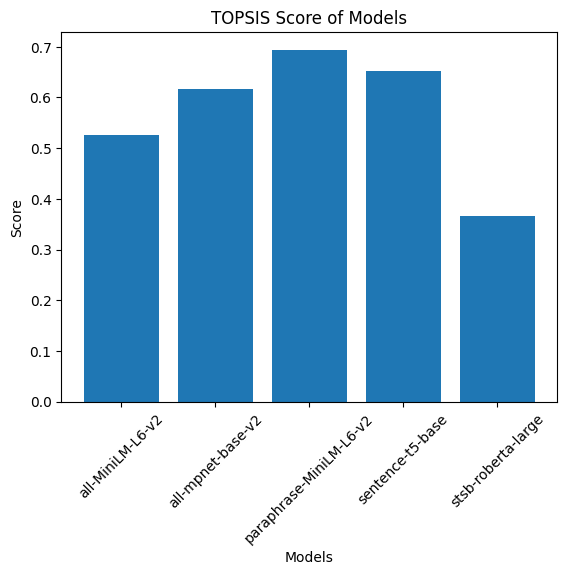

In [16]:
result = pd.read_csv("topsis_result.csv")

plt.figure()
plt.bar(result["Model"], result["Topsis Score"])
plt.title("TOPSIS Score of Models")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()
